# Import Raspberry Pi Images

## Initialize

In [1]:
# Import Packages
import skimage
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import cv2

import os
import glob

# Matplotlib inline
%matplotlib inline

In [5]:
# Load Images
imset = np.array([cv2.imread(i) for i in glob.glob("../newFom/thefan.jpg")])
# imset = cv2.cvtColor(imset[0]

# print("Size of our dataset: {} images.\nEach image has dimensions: {}.\nEach channel is of type: {}".format( \
#     imset.shape[0], imset[0].shape, type(imset[0][0][0][0])))
type(imset[0])

numpy.ndarray

## Process Image
_Find interesting real-estate on the image_

### loop and look and slice and test to find the dots

_reference: https://stackoverflow.com/questions/8076889/how-to-use-opencv-simpleblobdetector _

#### Import Images

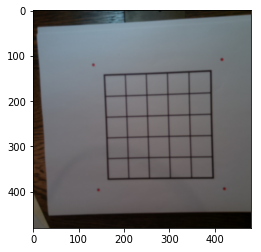

In [6]:
#TODO: GENERALIZE IMPORT OF IMAGES

# Select Image from imageset using opencv, show
img = imset[0]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


#### Initialize Detector

In [7]:
# Initialize Params
    # Ref: https://www.learnopencv.com/blob-detection-using-opencv-python-c/
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 10
# Filter by Area.
params.filterByArea = True
#params.minArea = 1500
params.maxArea = 50
#filter by color
params.filterByColor = 1

# check opencv version and construct the detector
    # Ref: https://stackoverflow.com/questions/48136978/how-to-use-feature2dsuch-as-simpleblobdetector-correctly-python-opencv/48137140
is_v2 = cv2.__version__.startswith("2.")
if is_v2:
    detector = cv2.SimpleBlobDetector(params)
else:
    detector = cv2.SimpleBlobDetector_create(params)

#### Detect Blobs

In [8]:
# Detect blobs
keypoints = detector.detect(img)

#### Display Results

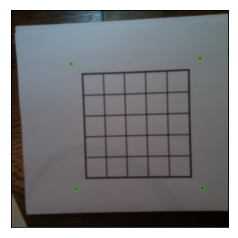

In [10]:
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# plt.imshow(im_with_keypoints, cmap = 'gray', interpolation = 'bicubic')
plt.imshow(im_with_keypoints, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.savefig('lol.jpg', bbox_inches='tight')
plt.show()

# Save Image

#### Grab Coordinates of blobs

In [34]:
# print([keypoints[i].pt for i in range(3)])
points = [[keypoints[i].pt[0], keypoints[i].pt[1]] for i in range(4)]
print(points)

[[420.97772216796875, 393.0423583984375], [143.625244140625, 395.688720703125], [415.5641784667969, 108.42285919189453], [132.505859375, 120.3319091796875]]


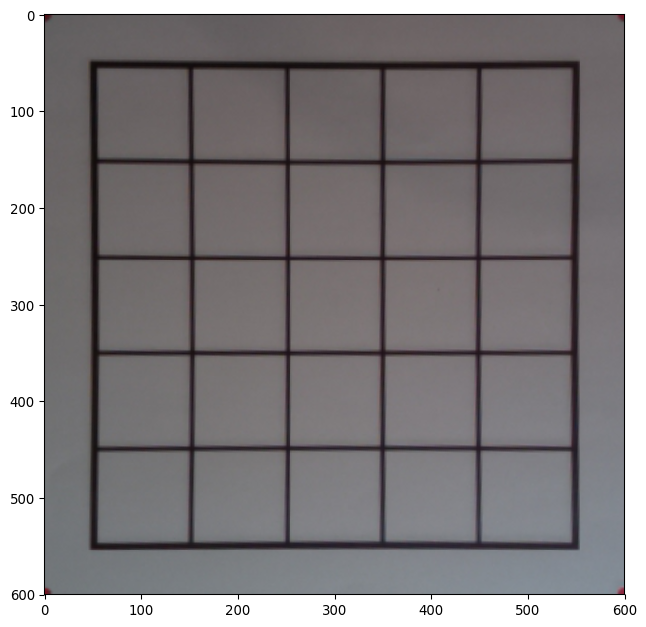

In [38]:


# define the input and output image points to warp
inpts = np.float32(points)
outpts = np.float32([[0, 0],[600, 0],[0, 600],[600, 600]])

# calculate a perspective transform based on the points given above
M = cv2.getPerspectiveTransform(inpts, outpts)

# warp the image perspective with the perspective transform calculated above
img_warp = cv2.warpPerspective(img, M, (600,600))

# display the warped image
plt.figure(figsize=(8, 8), dpi=96)
plt.imshow(img_warp, cmap='gray')
plt.show()

#### Cut the image into segments

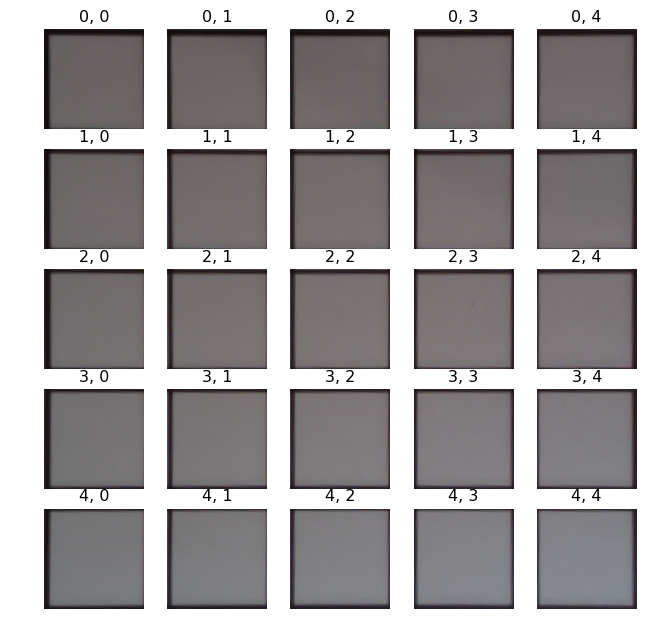

In [39]:
# create a figure to hold subplots for the split images
fig1 = plt.figure(figsize=(8, 8), dpi=96)

# create a list for the subplots which will be programmatically filled
axes = []

# create the 25 (5*5) subplots and put them in the list
xdim = 5
ydim = 5
cellsize = int(500 / xdim) # each cell is 96x96 pixels (480/5)
for row in range(0, ydim):
    for col in range(0, xdim):
        axes.append(plt.subplot2grid((xdim,ydim),(row,col)))

# iterate through the list of subplots and draw them
cur = 0
onrow = 0
oncol = 0
for ax in axes:
    ax.axis('off')
    ax.set_title("%d, %d" % (onrow, oncol))
    # each subplot is a 96x96 slice of the warped image!
    ax.imshow(img_warp[(cellsize*onrow+50):(cellsize*onrow+cellsize+50), (cellsize*oncol+50):(cellsize*oncol+cellsize+50)], cmap='gray')
    cur = cur + 1
    if cur % xdim == 0:
        onrow = onrow + 1
    oncol = cur % xdim
        
plt.show()

1. Publish grid pdf (black dots, 8-fold symmetry, even gridline size)
2. Publish work to zachandfox fork
3. Print set of doughnuts, dot them w/ marker, run blob detection
4. Generalize process
5. Profit

record the location of the dots

test your locations to make sure you got em.

    if (got dots) then I expect to see lines here and here
        DO I have a line? 
        Do I have a second line?
    if (got lines) then set flag true
        

     alternativly
 		If I (got dots) I can transform as necessary to put the dots in a proper place
 			get the letters cause we know they are each in a box.
 			#this required a new form with more location marks - dots 
 			#see the NewForm folder in the TDS_Image_Proj folder

if (got dots and flag) then
	calculate the transform to get the lines square.
	apply the transform
	loop 24 times 
		each itteration to get one of the images
		output the images to a special folder and drink a beer. part one of n-1 parts done!!!
		

## Export